In [8]:
!pip install mlxtend


# 🛍️ SmartCart Starter Notebook
This notebook will guide you through your group project on collaborative filtering and association rule mining for an e-commerce recommender system.

## 📥 Part 1: Data Preprocessing
Steps:
- Load `ecommerce_user_data.csv` and `product_details.csv`
- Merge data if necessary
- Create user-item matrix
- Fill missing ratings with 0
- Group user behavior by category

In [1]:
# Load data
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

user_data = pd.read_csv('ecommerce_user_data.csv')
product_data = pd.read_csv('product_details.csv')

print(user_data.head())
print(product_data.head())

  UserID ProductID  Rating   Timestamp  Category
0   U000     P0009       5  2024-09-08     Books
1   U000     P0020       1  2024-09-02      Home
2   U000     P0012       4  2024-10-18     Books
3   U000     P0013       1  2024-09-18  Clothing
4   U000     P0070       4  2024-09-16      Toys
  ProductID      ProductName     Category
0     P0000      Toys Item 0     Clothing
1     P0001  Clothing Item 1  Electronics
2     P0002     Books Item 2  Electronics
3     P0003  Clothing Item 3  Electronics
4     P0004  Clothing Item 4  Electronics


In [2]:
# Create user-item matrix
user_item_matrix = user_data.pivot_table(index='UserID', columns='ProductID', values='Rating')
user_item_matrix_filled = user_item_matrix.fillna(0)
user_item_matrix_filled.head()

ProductID,P0000,P0001,P0002,P0003,P0004,P0005,P0006,P0007,P0008,P0009,...,P0090,P0091,P0092,P0093,P0094,P0095,P0096,P0097,P0098,P0099
UserID,,,,,,,,,,,,,,,,,,,,,
U000,0.0,0.0,0.0,3.0,0.0,5.0,0.0,3.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U001,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
U002,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
U004,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0


In [3]:
# Aggregate user behavior by category
user_category_agg = user_data.groupby(['UserID', 'Category']).agg({'Rating': ['count', 'mean']}).reset_index()
user_category_agg.columns = ['UserID', 'Category', 'TotalInteractions', 'AverageRating']
user_category_agg.head()

,UserID,Category,TotalInteractions,AverageRating
0,U000,Books,6,3.666667
1,U000,Clothing,3,1.666667
2,U000,Electronics,3,3.666667
3,U000,Home,2,1.000000
4,U000,Toys,6,3.500000


## 🤝 Part 2: User-Based Collaborative Filtering
Steps:
- Use cosine similarity to compare users
- Recommend top-N products based on similar users
- Evaluate with Precision@K and Coverage

In [4]:
# Compute cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(user_item_matrix_filled)
similarity_df = pd.DataFrame(similarity_matrix, index=user_item_matrix_filled.index, columns=user_item_matrix_filled.index)
similarity_df.head()

UserID,U000,U001,U002,U003,U004,U005,U006,U007,U008,U009,...,U040,U041,U042,U043,U044,U045,U046,U047,U048,U049
UserID,,,,,,,,,,,,,,,,,,,,,
U000,1.000000,0.063071,0.195522,0.023466,0.065412,0.161251,0.160096,0.092083,0.238263,0.274844,...,0.241693,0.129483,0.156790,0.132200,0.161478,0.100346,0.126917,0.150727,0.000000,0.104294
U001,0.063071,1.000000,0.190861,0.000000,0.111332,0.009540,0.000000,0.172286,0.167460,0.017593,...,0.121540,0.024075,0.097953,0.007821,0.000000,0.000000,0.193670,0.247805,0.000000,0.000000
U002,0.195522,0.190861,1.000000,0.065094,0.111662,0.050830,0.027756,0.055877,0.000000,0.181229,...,0.144756,0.000000,0.217465,0.000000,0.055992,0.034794,0.194243,0.110030,0.177165,0.000000
U003,0.023466,0.000000,0.065094,1.000000,0.035737,0.104116,0.026650,0.000000,0.025384,0.288009,...,0.243836,0.000000,0.000000,0.074688,0.197121,0.000000,0.054396,0.126773,0.374228,0.250000
U004,0.065412,0.111332,0.111662,0.035737,1.000000,0.159064,0.057144,0.026294,0.195942,0.247023,...,0.062741,0.116202,0.078797,0.048044,0.103747,0.133716,0.124969,0.217464,0.255318,0.172729


In [5]:
# Create recommendation function
# Find most similar user, recommend products they rated highly that target user hasn’t rated
def leave_one_out_split(user_item_matrix):
    train_data = user_item_matrix.copy()
    test_data = {}

    for user in user_item_matrix.index:
        interacted_items = user_item_matrix.loc[user][user_item_matrix.loc[user] > 0].index.tolist()
        if len(interacted_items) > 1:
            test_item = np.random.choice(interacted_items)
            test_data[user] = {test_item}
            train_data.loc[user, test_item] = 0  # Remove test item from training
    
    return train_data, test_data

# Apply Leave-One-Out
train_matrix, ground_truth = leave_one_out_split(user_item_matrix_filled)

# Recommendation function based on similar users
def recommend_items(user_id, train_matrix, similarity_df, k=5):
    """
    Recommend top-K items to a user based on the highest-rated items from similar users.
    """
    if user_id not in similarity_df.index:
        return []

    similar_users = similarity_df[user_id].sort_values(ascending=False)[1:6].index  # Top 5 similar users
    user_ratings = train_matrix.loc[similar_users].mean().sort_values(ascending=False)  # Aggregate ratings

    # Filter out already interacted items
    interacted_items = train_matrix.loc[user_id][train_matrix.loc[user_id] > 0].index.tolist()
    recommended_items = [item for item in user_ratings.index if item not in interacted_items][:k]

    return recommended_items


In [6]:
# Implement evaluation metrics like Precision@K and Coverage
# Example: compare recommended vs actual rated items
# Evaluation metrics
def precision_at_k(recommended, relevant, k):
    if len(relevant) == 0:
        return 0
    return len(set(recommended[:k]) & relevant) / k

def recall_at_k(recommended, relevant, k):
    if len(relevant) == 0:
        return 0
    return len(set(recommended[:k]) & relevant) / len(relevant)

# Coverage metric (how many items get recommended across users)
def coverage(recommendations, total_items):
    recommended_items = set(item for rec in recommendations.values() for item in rec)
    return len(recommended_items) / total_items

# Compute metrics
k = 4
precision_scores, recall_scores = [], []
recommendations = {}

for user in ground_truth.keys():
    recs = recommend_items(user, train_matrix, similarity_df, k)
    recommendations[user] = recs

    relevant_items = ground_truth[user]
    precision_scores.append(precision_at_k(recs, relevant_items, k))
    recall_scores.append(recall_at_k(recs, relevant_items, k))

print(f"Precision@{k}: {np.mean(precision_scores):.4f}")
print(f"Recall@{k}: {np.mean(recall_scores):.4f}")
print(f"Coverage: {coverage(recommendations, len(user_item_matrix_filled.columns)):.4f}")

Precision@4: 0.0800
Recall@4: 0.3200
Coverage: 0.7400


In [7]:
def recommend_products(user_id, k=5):
    """Recommend K products for a given user using similar users' ratings."""
    if user_id not in similarity_df.index:
        return []
    
    # Get similar users (excluding the user themselves)
    similar_users = similarity_df[user_id].sort_values(ascending=False).iloc[1:6]  # Top 5 similar users
    
    # Aggregate ratings from similar users
    weighted_ratings = user_item_matrix_filled.loc[similar_users.index].T.dot(similar_users)
    
    # Sort by predicted rating
    recommended_products = weighted_ratings.sort_values(ascending=False).index.tolist()
    
    return recommended_products[:k]

def evaluate_recommender(k=5):
    """Evaluate recommender with Precision@K, Recall@K, and Coverage."""
    precision_scores = []
    recall_scores = []
    all_recommended_items = set()  # Track unique recommended items
    all_items = set(user_item_matrix_filled.columns)  # All products

    for user_id in user_item_matrix_filled.index:
        actual_relevant = set(user_item_matrix.loc[user_id].dropna().index)  # Items user interacted with
        
        if len(actual_relevant) < 1:
            continue  # Skip users with no interactions
        
        recommended = recommend_products(user_id, k)
        
        # Compute Precision@K
        precision = len(set(recommended) & actual_relevant) / k
        precision_scores.append(precision)
        
        # Compute Recall@K
        recall = len(set(recommended) & actual_relevant) / len(actual_relevant)
        recall_scores.append(recall)
        
        # Track unique recommended items for Coverage
        all_recommended_items.update(recommended)

    # Compute mean Precision and Recall
    avg_precision = sum(precision_scores) / len(precision_scores)
    avg_recall = sum(recall_scores) / len(recall_scores)

    # Compute Coverage
    coverage = len(all_recommended_items) / len(all_items)

    return avg_precision, avg_recall, coverage

# Run evaluation
precision_k, recall_k, coverage_k = evaluate_recommender(k=5)
print(precision_scores)
print(sum(precision_scores))
print(len(precision_scores))

print(f"Precision@5: {precision_k:.4f}")
print(f"Recall@5: {recall_k:.4f}")
print(f"Coverage: {coverage_k:.4f}")


[0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.25, 0.25, 0.25, 0.0, 0.0, 0.25, 0.25, 0.0]
4.0
50
Precision@5: 0.5880
Recall@5: 0.2096
Coverage: 0.5900


In [15]:
def evaluate_recommender(k=5):
    """Evaluate recommender with Precision@K, Recall@K, Coverage, and MAP.
       Also prints recommendations alongside actual rated products."""
    precision_scores = []
    recall_scores = []
    average_precisions = []  # Store AP for each user
    all_recommended_items = set()  # Track unique recommended items
    all_items = set(user_item_matrix_filled.columns)  # All products

    for user_id in user_item_matrix_filled.index:
        actual_relevant = set(user_item_matrix.loc[user_id].dropna().index)  # Items user interacted with
        
        if len(actual_relevant) < 1:
            continue  # Skip users with no interactions
        
        recommended = recommend_products(user_id, k)

        # Compute Precision@K
        precision = len(set(recommended) & actual_relevant) / k
        precision_scores.append(precision)
        
        # Compute Recall@K
        recall = len(set(recommended) & actual_relevant) / len(actual_relevant)
        recall_scores.append(recall)
        
        # Compute Average Precision (AP)
        num_hits = 0
        sum_precisions = 0
        for i, item in enumerate(recommended, start=1):
            if item in actual_relevant:
                num_hits += 1
                sum_precisions += num_hits / i  # Precision at this rank

        ap = sum_precisions / min(len(actual_relevant), k) if actual_relevant else 0
        average_precisions.append(ap)
        
        # Track unique recommended items for Coverage
        all_recommended_items.update(recommended)

    # Compute mean Precision and Recall
    avg_precision = sum(precision_scores) / len(precision_scores)
    avg_recall = sum(recall_scores) / len(recall_scores)

    # Compute Coverage
    coverage = len(all_recommended_items) / len(all_items)

    # Compute Mean Average Precision (MAP)
    mean_ap = sum(average_precisions) / len(average_precisions)

    return avg_precision, avg_recall, coverage, mean_ap

# Run evaluation
precision_k, recall_k, coverage_k, map_k = evaluate_recommender(k=5)
print(f"Precision@5: {precision_k:.4f}")
print(f"Recall@5: {recall_k:.4f}")
print(f"Coverage: {coverage_k:.4f}")
print(f"MAP@5: {map_k:.4f}")


Precision@5: 0.5880
Recall@5: 0.2096
Coverage: 0.5900
MAP@5: 0.5117


## 🔍 Part 3: Association Rule Mining (Apriori)
Steps:
- Convert user-product interactions to transaction format
- Apply Apriori algorithm to find frequent itemsets
- Generate association rules (support, confidence, lift)

In [9]:
# Convert to transaction format
from mlxtend.preprocessing import TransactionEncoder
transactions = user_data.groupby('UserID')['ProductID'].apply(list).tolist()
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

In [10]:
# Apply Apriori and generate rules
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(df_trans, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()

,antecedents,consequents,support,confidence,lift
0,(P0000),(P0008),0.06,0.500000,2.777778
1,(P0000),(P0023),0.06,0.500000,3.125000
2,(P0000),(P0030),0.06,0.500000,2.272727
3,(P0000),(P0071),0.06,0.500000,2.777778
4,(P0091),(P0001),0.08,0.571429,3.174603


## 📊 Part 4: Visualization
Steps:
- Plot user similarity heatmap
- Plot top frequent itemsets
- Visualize top recommendations

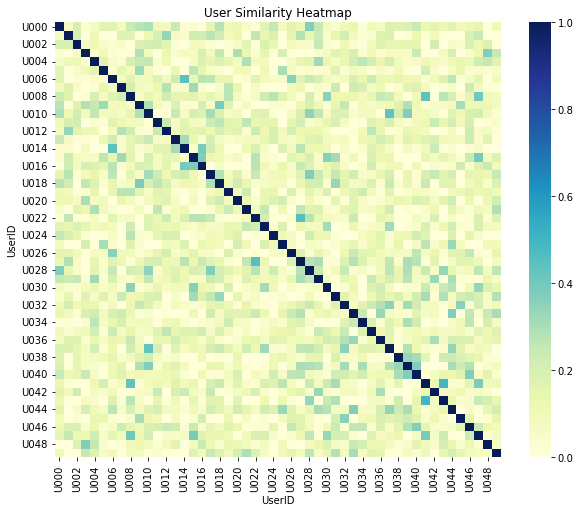

In [11]:
# Heatmap of user similarity
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, cmap='YlGnBu')
plt.title('User Similarity Heatmap')
plt.show()

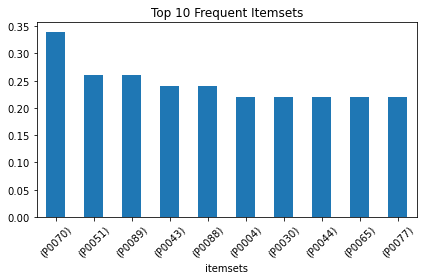

In [12]:
# Frequent itemsets bar chart
frequent_itemsets.nlargest(10, 'support').plot(kind='bar', x='itemsets', y='support', legend=False)
plt.title('Top 10 Frequent Itemsets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🧠 Part 5: Conceptual Questions
Answer the following questions in your report:
1. How does data sparsity affect performance?
2. What kinds of product bundles were discovered?
3. What improvements would you suggest for real-world deployment?